# [Intro to Razor Page and Page Model](https://docs.microsoft.com/en-us/aspnet/core/razor-pages/?view=aspnetcore-6.0&tabs=visual-studio)
## In order to add functionality to the view layer, we must add a **_PageModel_ class**

## This class is usually found in the _cshtml.cs_, placed in the same folder as the view page

## The class file share the same file name as the view page, albeit with an additional *_.cs_* on the end to denote the fact that its's actually a C# class file

## So if we have a view page at Pages/Index.cshtml, the _model page_ will be available in Pages/Index.cshtml.cs 
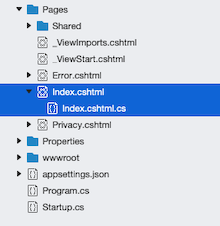

/Index.cshtml.cs

In [ ]:
using System;
using System.Collections.Generic;
using System.Linq;
using System.Threading.Tasks;
using Microsoft.AspNetCore.Mvc;
using Microsoft.AspNetCore.Mvc.RazorPages;
using Microsoft.Extensions.Logging;

namespace TestApp.Pages
{
    public class IndexModel : PageModel
    {
        //private readonly ILogger<IndexModel> _logger;

        /*public IndexModel(ILogger<IndexModel> logger)
        {
            _logger = logger;
        }*/

        public string Greet { get; set; }

        public void OnGet()
        {
            Greet = "Welcome Stranger!";
        }
    }
}

## Our model for the view page will be responsable for exposing methods, commands, and other propoerties that help maintain the state of the view, and trigger events in the view istelf.

## Advantages that comes when separating the logic from the view page:
* ## Smaller and more reusable units of code allow for flexibility to create scalable apps with more ease.
* ## View pages will be easier to maintain if the model needs to be updated or requires changes. 
* ## Distinct sections also allow for code to be _unit tested_, a practice of creating tests for testing the written code, which ultimately allows for automated testing - a concept that becomes ever more important as a project grows in size and expands functionality 

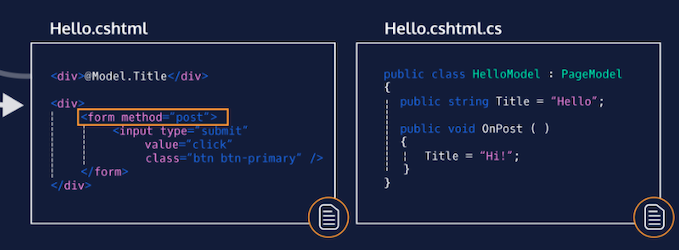

* ## In the _model page_, Hello.cshtml,  we can see how a property is defined and assigned a value
* ## We define how the method works, When it is called and what UI element will change? 

Hello.cshtml.cs

In [ ]:
public string Title = "Hello";

In [ ]:
public void OnPost()
{
  Title = "Hi!";
}

### Here we are updating the value of the **property** _Title_ to "Hi!" once the method, _OnPost()_ is called.  

* ## In the _view page_ we are displaying the values of _Title_ 

Hello.cshtml

In [ ]:
<div>@Model.Title</div>

* ## We are also making use of this method by submitting a form.

In [ ]:
<form method="post">
...
</form>

## Once the submit button is clicked, the method _OnPost()_ will be called, and the value of _Title_ will be updated from "Hello" to "Hi".

# Working with Page Model
## With a page model, you can create certain data and behaviors that you will be able to call from the view page. 
## Lets say you want to display information about a user in a user profile page.
## You can create a class holding propoerties of interest for that user ex. Username, age, birthday, etc) and simply call the propoerties in the view page.
## Moreover, what if the user wants to update their username? The class can hold a method to update the username property!

## The model you create must inherit from the _PageModel_ class to have access various propoerties that will be useful when working with HTTP requests. 

# Example

In [ ]:
using System;
using Microsoft.AspNetCore.Mvc.RazorPages;
 
namespace RazorTest.Pages
{
  public class UserModel : PageModel
  {
    public string ConvertToUsername (string firstName)
    {
      return "l33t_user_" + firstName;
    }
 
    public int Age { get; set; }
    public string Username { get; set; }
    public bool Status { get; set; }
    public DateTime Birthday { get; set; }
 
    public void OnGet()
    {
      Age = 25;
      Username = ConvertToUsername("John");
      Status = true;
      Birthday = DateTime.Now;
    }
  }
}

## In the above model, there are 4 propoerties that will be accessible in the view page
## When the _OnGet()_ method is called it will assign the values to the properties

## The _OneGet()_ method is called an _handler method_ in Razor Pages. These are methods that are **_executed as a result of a request_**
## Let's say a user wants to view their profile page on a webiste they are registered at.
## Once the profile page is reached, a GET request will be sent to the server to fetch all the information about the said user. 
## The GET request invokes the _OnGet()_ method.
## In our case we are assigning values to the properties in our _UserModel_ once the page is loaded

#

## @page is the first line of code for every view page in order for the file to be treated as a Razor Page.

## Once a model has been created you can access its properties and methods in the view page using _@model_ followed by the model:

In [ ]:
@model ModelName

## After the model has been specified, Razor exposes a _Model_ property for accessing the model passed to the view:

In [ ]:
@page
@model UserModel
<div>
  Age: @Model.Age
  <br />
  Username: @Model.Username
  <br />
  Status: @Model.Status
  <br />
  Birthday: @Model.Birthday.ToString("MM/dd/yyyy")
</div>

< /br > element produce a line break in text (carriage-return)

## You can also created methods and call the in the _OnGet()_ method. 

In [ ]:
public string ConvertToUsername (string firstName)
{
  return "l33t_user_" + firstName;
}

# Excercise - Pizza Order

Pizza.cshtml.cs

In [ ]:
using System;
using System.Collections.Generic;
using System.Linq;
using System.Threading.Tasks;
using Microsoft.AspNetCore.Mvc;
using Microsoft.AspNetCore.Mvc.RazorPages;

namespace starting_app.Pages
{
  public class PizzaModel : PageModel
  {
    public string Customer{get; set;}
    public string Order {get; set;}
    public bool ExtraCheese{get; set;}

     public double Total {get; set;}

    public double PizzaTotal (string pizzaType)
    {
      Dictionary<string, double> PizzaCost = new Dictionary<string, double>()
      {
        { "Cheese", 10 },
        { "Pepperoni", 11 },
        { "Vegetarian", 12 },
      };
      
      return PizzaCost[pizzaType];
    }

    public void OnGet()
    {
      Customer = "Leo";
      Order = "Cheese";
      ExtraCheese = false;
      Total = PizzaTotal("Cheese");
    
    }
  }
}

Pizza.cshtml

@page 
<!-- Specify the model below -->
@model PizzaModel
@{
}

<h1 class="text-center">Codecademy Pizza</h1>
<br>
<div class="card mx-auto" style="width: 18rem;">
  <img src="https://image.flaticon.com/icons/svg/1404/1404945.svg" class="card-img-top" alt="pizza icon">
  <div class="card-body">
    <h4 class="card-title text-center">Confirm your order</h4>
    <br>
		<h5>Pizza for: @Model.Customer</h5>
		<h5>Order: @Model.Order</h5>
    <h5>Extra Cheese: @Model.ExtraCheese</h5>
		<h5>Total: $@String.Format("{0:0.00}", Model.Total)</h5>
    <br>
    <a href="#" class="btn btn-primary">Place Order</a>
  </div>
</div>

## To render the _Total_ property as a cost price, we use the Coin Value Symbol, $ or others, using _String.Format("{0:0.00}", Model.Tota)_ 

Example

In [ ]:
double cost = 15.00;
string formattedCost = String.Format("{0:0.00}", cost);

# ViewData
## _ViewData_ allow us to pass information from the page model into the _view page_
## _ViewData_ is of type _ViewDataDictionary, which acts as a generic dictionary_
# What exactly is a _dictionary_ in C#? 
## In reality a dictionary is a collection of words and their definitions. 
## In a similar fashion, in [C# a dictionary](https://docs.microsoft.com/en-us/dotnet/api/system.collections.generic.dictionary-2?view=net-6.0) is a collection of _keys_ and _values_


## We can add key/value pairs to our _ViewData_ in the _PageModel_

In [ ]:
public class IndexModel : PageModel
{
  public void OnGet()
  {
    ViewData["MyDogsName"] = "Alfie";
    ViewData["MyDogsAge"] = 7;
  }
}

## _ViewData_ that is already created, is accessibile in the view page and we can refer to the values sotred in them by calling the key names:

@page
@model RazorTest.Pages.ExampleModel
<div>
  <p>My dog @ViewData["MyDogsName"] is @ViewData["MyDogsAge"] years old</p>
...
</div>

# Excerices - ViewData["keys"]

Profile.cshtml.cs

In [ ]:
using System;
using System.Collections.Generic;
using System.Linq;
using System.Threading.Tasks;
using Microsoft.AspNetCore.Mvc;
using Microsoft.AspNetCore.Mvc.RazorPages;

namespace MyApp.Namespace
{
  public class ProfileModel : PageModel
  {
    public void OnGet()
    {
      ViewData["myName"] = "Leonardo";
      ViewData["username"] = "lenny";
      ViewData["myOccupation"] = "Dev";
      ViewData["myAge"] = 27;
      ViewData["currentDate"] = "11/19/21";
    }
  }
}

Profile.cshtml

In [ ]:
@page
@model MyApp.Namespace.ProfileModel
@{
}

<div class="container">
	<div class="row">
		<div class="col-12">
			<div class="card">
				<div class="card-body">
					<div class="card-title mb-4">
						<div class="d-flex justify-content-start">
							<div class="image-container">
								<img src="http://placehold.it/150x150" id="imgProfile" style="width: 150px; height: 150px" class="img-thumbnail" />
							</div>
							<div class="userData ml-3">
								<h2 class="d-block" style="font-size: 1.5rem; font-weight: bold">
                @ViewData["username"]   
                </h2>
							</div>
						</div>
					</div>

					<div class="row">
					  <div class="col-12">
						  <ul class="nav nav-tabs mb-4" id="myTab" role="tablist">
							  <li class="nav-item">
									<a class="nav-link active" href="#">Basic Info</a>
								</li>
							</ul>
              
						  <div class="tab-content ml-1" id="myTabContent">
							  <div class="tab-pane fade show active" id="basicInfo" aria-labelledby="basicInfo-tab">
									<div class="row">
										<div class="col-sm-3 col-md-2 col-5">
											<label style="font-weight:bold;">Full Name</label>
										</div>
                    <div class="col-md-8 col-6">
                        @ViewData["myName"]
                    </div>
									</div>
									<hr />

                  <div class="row">
                    <div class="col-sm-3 col-md-2 col-5">
                      <label style="font-weight:bold;">Age</label>
                    </div>
                    <div class="col-md-8 col-6">
                          @ViewData["myAge"]
                      
                    </div>
                  </div>
									<hr />

                  <div class="row">
                      <div class="col-sm-3 col-md-2 col-5">
                          <label style="font-weight:bold;">Occupation</label>
                      </div>
                      <div class="col-md-8 col-6">
                        @ViewData["myOccupation"]

                      </div>
                  </div>
                  <hr />
                  
                  <div class="row">
                    <div class="col-sm-3 col-md-2 col-5">
                      <label style="font-weight:bold;">Current Date</label>
                    </div>
                      <div class="col-md-8 col-6">
                        @ViewData["currentDate"]

                      </div>
                  </div>
                <hr/>
							</div>
						</div>
					</div>
				</div>
			</div>
    </div>
  </div>
</div>

# Sharing Pages
## Lets say we are building an application that contains an header throughout most of your pages. If we’re creating the markup for all these pages, the header will still need to be added to each one.
## To avoid redundacy we can store the header somewhere separate and rendering its content on each page
* ## Standard practice is to **specify the location of the main layout page in the __ViewStart.cshtml_ file**
## This file is automatically generated under _/**Pages**_ when we create a template wth ASP.NET and it looks like this:

_ViewStart.cshtml

In [ ]:
@{
    Layout = "_Layout";
}

## Here we are dircting our app to use the _**_Layout**_ file as the main layout for all of our content. 
## But where is __Layout_  coming from?
## Razor Pages searches by walking up to the directory tree  of the calling page looking for the filename specified followed by the /Pages/Shared folder. 

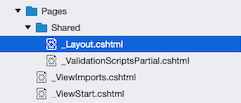

By convention, layout pages use a leading **underscore** in their file name : **_Layout.cshtml**

## In the generated Razor Pages template the __Layout.cshtml_ file will contain a method call, **_@RenderBody()_** within the < body > tags:

<div class="container">
    <main role="main" class="pb-3">
        @RenderBody()
    </main>
</div>

## When we work on our own _view pages_, the content will be rendered wherever _@RenderBody()_ is being called on the layout page

## One other advantage of sharing pages this way is that we can use our handy _View Data_ dictionary and pass data down into our _**layout page**_
## Let's say that different pages in our app will have their own title tags. We can create a _ViewData_ key/value pair set to title as the propery, and unique titles as the values for different pages:

About.cshtml

In [ ]:
@{
    ViewData["Title"] = "About";
}

## With our key/value defined 
## Our Layout will render the value for the title of the page depending on where it's defined, this allow us to avoid creating unnecessary proporties in our PageModel and save us some spaces!

## We don't want always have to use the main layout provided for all of our contewnt. 
## If we want to specify our own layout pages we can do this at the top of our content page. 
## Razor is smart enough to search through a set of predefined locations, so we don't need to provide the whole path of where our layout is located. 
## The filename (_.cshtml_ not needed) should suffice: 

In [ ]:
@{
    Layout = "_NewLayout";
}

# Excercise

_Layout.cshtml

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="utf-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0" />
  <title>@ViewData["Title"] - Starting App</title>
  <link rel="stylesheet" href="~/lib/bootstrap/dist/css/bootstrap.min.css" />
  <link rel="stylesheet" href="~/css/site.css" />
</head>
<body>
  <header>
    <nav class="navbar navbar-expand-sm navbar-toggleable-sm navbar-light bg-white border-bottom box-shadow mb-3">
      <div class="container">
        <a class="navbar-brand" asp-area="" asp-page="/Index">Starting App</a>
        <button class="navbar-toggler" type="button" data-toggle="collapse" data-target=".navbar-collapse" aria-controls="navbarSupportedContent"
                aria-expanded="false" aria-label="Toggle navigation">
          <span class="navbar-toggler-icon"></span>
        </button>
        <div class="navbar-collapse collapse d-sm-inline-flex flex-sm-row-reverse">
          <ul class="navbar-nav flex-grow-1">
            <li class="nav-item">
              <!-- Add List Item below -->
              <a class="nav-link text-dark" asp-page="/Index">Home</a>
            </li>
            <li class="nav-item">
              <!-- Add List Item below -->
              <a class="nav-link text-dark" asp-page="/Privacy">Privacy</a>
            </li>
          </ul>
        </div>
      </div>
    </nav>
  </header>
  <div class="container">
    <main role="main" class="pb-3">
      <!-- Add Render Body below -->
      @RenderBody()
      This message is shared between pages. You are currently on page @ViewData["Title"]
    </main>
  </div>

  <footer class="border-top footer text-muted">
    <div class="container">
      <!-- Footer Content below -->
      &copy; 2019 - RazorTest - <a asp-area="" asp-page="/Privacy">Privacy</a>
    </div>
  </footer>

    <script src="~/lib/jquery/dist/jquery.min.js"></script>
    <script src="~/lib/bootstrap/dist/js/bootstrap.bundle.min.js"></script>
    <script src="~/js/site.js" asp-append-version="true"></script>

    @RenderSection("Scripts", required: false)
</body>
</html>

# Working with __ViewImports_
# On top of sharing layouts, we're also provided with a file where we can include directives that will become available globally throughout the rest of our pages. This save us work in typing and makes maintenance easier.

## There are number of directives that you will be able to include in **__ViewImports.cshtml_**, three of the most common ones added by default are : 

* ## _@namespace_ : Namespaces help us organize our code into groups by giving them some context. With namespaces, we 're able to avoid any naming collision with other classes of the same name. In this case, the namespace is used to declare the root namespace for your Pages. The default generated __ViewImports.cshtml_ file for most projects will have:

In [ ]:
@namespace ProjectName.Pages

## You can only have _one_ @namespace directive per **___ViewImports.cshtml**

* ## _@using_ : Allows us to add imports to all of our Pages instead of having to add them individually per page. For example, if our __ViewImports.cshtml_ contains :

In [ ]:
@using Microsoft.Extensions.Localization;

## Any pages under that folder will have access to members under _Microsoft.Extensions.Localization_ namespace without having to explicitly import them with @using

* ## _@addTagHelpers_ : This directive is used to give access to Tag Helpers throughout our pages. The default directive includes:

In [ ]:
@addTagHelper *, Microsoft.AspNetCore.Mvc.TagHelpers

## wich imports all Tag Helpers to our Pages. We will look more into later..

## As we want to keep separate portions of code so that __ViewImports_ cares about imports, __ViewStart_ cares about the logic required for the view pages

# Using Partials
## In certain cases, we might end up reusing snippets of HTML, such as forms, on different pages. 
## We can also use these "partials" to break up more complex pages into smaller sections. This is another way to reduce duplication of common markup content across different files and keep our code DRY. 

## Partial file names also begin with an underscore in their name (convention). And in order to render the content we can use the following syntax in our content page:

In [ ]:
<partial name="_PartialName" />

## Where _name_ refers to the filename of the partial
## Example:

## If our partial has the following content:

_MyPartial.cshtml

In [ ]:
<div>Here's some content from a partial! 
</div>

## We can use the partial in a separate page as follows:

In [ ]:
<div>
  <h1>Welcome to My Page!</h1>
  <partial name="_MyPartial"/>
</div>

# Excercise - LogIn 

_Form.cshtml

In [ ]:
<form>
    <div class="form-group">
      <label for="exampleInputEmail1">Email address</label>
      <input type="email" class="form-control" id="exampleInputEmail1" aria-describedby="emailHelp" placeholder="Enter email">
      <small id="emailHelp" class="form-text text-muted">We'll never share your email with anyone else.</small>
    </div>
    <div class="form-group">
      <label for="exampleInputPassword1">Password</label>
      <input type="password" class="form-control" id="exampleInputPassword1" placeholder="Password">
    </div>
    <button type="submit" class="btn btn-primary">Submit</button>
  </form>


<main role="main" class="pb-3">
            <div>
                <h1>Welcome to My Page!</h1>
                <!-- Adding a Partial -->
                <partial name="_Form" />
            </div>
        </main>

# 

# Tag Helpers
## Tag Helpers are very useful ways to create HTML elements with server-side attributes. For example, when we use an anchor tag, < a > , we usually have an _href_ attribute to direct the user to a specific page when they click it. 
## Razor Pages provides handy Tag Helpers that help us generate links and other useful information.

## So instead of writing an anchor tag as so:

In [ ]:
<a href="/Attendee?attendeeid=10">View Attendee</a>

## WE can rewirte it with a Tag Helper like this:

In [ ]:
<a asp-page="/Attendee"
   asp-route-attendeeid="10">View Attendee</a>

## There are many available predefined Tag Helpers to help us 
* generate links, 
* create forms, 
* load assets, etc. 
### There is even one to help us render partials which we just went over! So let’s go ahead and take a look at how some of them work.

## Certain tag helpers have optional attributes that they can take.

## The partial tag helpers has the following optional attributes:
* ## _for_ : Assign an expression to be evaluated against the current model. This is one way to pass data to the partial.

<partial name="_ItemPartial" for="Item" />

Note: The model syntax is inferred so we don’t need to use @Model.Item

* ## _model_ : The model which the partial references. This is another way to pass data into our partial. The main difference between _model_ and _for_, is that _model_ allows you to use a more speicific model instead of the inferred one that _for_ provides.
## However we **_cannot_** use it in conjunction with _for_ . 
## We must use one or the other:

<partial name="_ItemPartial" model="Model.Item" />

## In this case, we could pass in a brand new instance of our model:

* ## _view-data_ : Assigns a key/value pair of type _ViewDataDictionary_ that we can pass directly into the partial view:

@{
    ViewData["IsItemReadOnly"] = true;
}
 
<partial name="_ItemPartial" view-data="ViewData" />

## During runtime, the Razor Application will process the markup and when it reads out certain Tag Helpers it will convert them into plain HTML before sending the page to the user. 

## [ Here is a list of all the tag helpers provided by ASP.NET!](https://docs.microsoft.com/en-us/aspnet/core/mvc/views/tag-helpers/intro?view=aspnetcore-6.0#built-in-aspnet-core-tag-helpers)

# Excercise - Making a Dropdown list with Select Tag Helpers

Explorella.cshtml.cs

In [2]:
using System;
using System.Collections.Generic;
using System.Linq;
using System.Threading.Tasks;
using Microsoft.AspNetCore.Mvc;
using Microsoft.AspNetCore.Mvc.RazorPages;

namespace MyApp.Namespace
{
  public class ExplorellaModel : PageModel
  {
    public string Country { get; set; }
    
    
  //Creating a _List Property_ to store new Properties of the Country property
  public List<SelectListItem> Countries {get; set;} 
    
    public void OnGet()
    {
      //Populating the List Countries with Properties
      Countries = new List<SelectListItem>
          {
            new SelectListItem { Value = "AR", Text = "Argentina" },
            new SelectListItem { Value = "FR", Text = "France" },
            new SelectListItem { Value = "BR", Text = "Brazil"  },
            new SelectListItem { Value = "GER", Text = "Germany" },
            new SelectListItem { Value = "CHI", Text = "China"  },
          };
    }
  }
}

Unhandled Exception: (8,1): error CS7021: Cannot declare namespace in script code

@page
@model MyApp.Namespace.ExplorellaModel
@{
}

<div class="jumbotron jumbotron text-white" style="background-image: url(https://c1.staticflickr.com/1/725/20835879729_66b87b0759_b.jpg); background-repeat: no-repeat;
    background-position: center center;
    background-size: cover;">
	<div class="container">
		<h2 class="text-center display-3 mb-4">Welcome to Explorella!</h2>
	</div>
</div>
<h1 class="display-5">Pick your next destination!</h1>

<form class="form-inline">
  <label class="my-1 mr-2" for="inlineFormCustomSelectPref">Preference</label>
  
    
    
    
  <!-- Select Tag Helper is creating a Dropdown menu, selecting each Country propery, from the List Countries-->
   <select class="custom-select my-1 mr-sm-2" asp-for="Country" asp-items="Model.Countries">

       
       
    
  </select>

  <div class="custom-control custom-checkbox my-1 mr-sm-2">
    <input type="checkbox" class="custom-control-input" id="customControlInline">
    <label class="custom-control-label" for="customControlInline">Remember my preference</label>
  </div>

  <button type="submit" class="btn btn-primary my-1">Submit</button>
</form>